# Modelos de classificação

Esse jupyter tem como finalidade implementar os conceitos descritos no arquivo "descrição Machine Learning", Onde inicialmente irei aplicar os conceito da matriz de confusão, acurácia, escore de precisão e recall.

### Baixando as bibliotecas

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [38]:

y_true = [1,0,0,1,1,1,0,1,0,0]
y_pred = [1,0,1,0,1,0,1,0,1,0]

In [39]:
confusion_matrix(y_true, y_pred)

array([[2, 3],
       [3, 2]])

In [40]:
accuracy_score(y_true, y_pred)

0.4

In [41]:
precision_score(y_true, y_pred)

0.4

In [42]:
recall_score(y_true, y_pred)

0.4

### Realizando aplicação apartir de um conjunto de dados

In [43]:
import pandas as pd

In [44]:
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
--- Logging error ---
Traceback (most recent call last):
  File "/home/diego/.local/lib/python3.9/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/home/diego/.local/lib/python3.9/site-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/home/diego/.local/lib/python3.9/site-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/home/diego/.local/lib/python3.9/site-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/home/diego/.local/lib/python3.9/site-packages/pip/_vendor/rich/segment.py", line 249, in split_lines
    for segment in segments:
  File "/home/diego/.local/lib/python3.9/site-packages/pip/_vendor/rich/console.py", line 1283, in rende

In [45]:
base = pd.read_excel("BaseInadimplencia.xlsx",sheet_name = 'treino')
teste = pd.read_excel("BaseInadimplencia.xlsx",sheet_name = 'teste')

In [46]:
base

,SaldoConta,SaldoInvestimento,Situacao
0,-1.365390,-3.280278,0
1,-3.910816,-0.874096,0
2,-2.745822,-2.250098,0
3,-1.352205,-1.280924,0
4,-0.596639,-2.932358,0
...,...,...,...
817,2.609063,1.268911,1
818,2.258579,2.014766,1
819,1.446370,3.518259,1
820,2.678502,3.712650,1


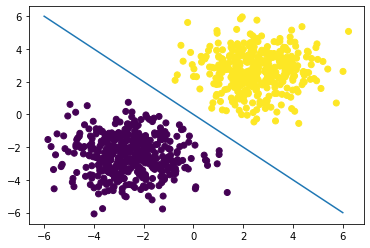

In [47]:
# Criando uma reta que separa os dados no gráfico
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(base.SaldoConta, base['SaldoInvestimento'],c = base.Situacao)
x = [6,-6]
y = [-6,6]
ax.plot(x, y)

plt.show()

In [48]:
# Transformando essa reta em uma função para classificar os pontos
def clf(x,y):
    # y_modelo = -x_modelo
    y_modelo = -x

    # Se y_modelo > y_dado -> class: 0
    if y_modelo >= y:
        return 0
    # Se y_modelo < y_dado -> class: 1
    elif y_modelo < y:
        return 1

In [49]:
# Aplicando a função aos dados de treino
base['predict'] = base.apply(lambda x:clf(x['SaldoConta'],x['SaldoInvestimento']),axis=1)
teste['predict'] = teste.apply(lambda x:clf(x['SaldoConta'],x['SaldoInvestimento']),axis=1)

In [50]:
base

,SaldoConta,SaldoInvestimento,Situacao,predict
0,-1.365390,-3.280278,0,0
1,-3.910816,-0.874096,0,0
2,-2.745822,-2.250098,0,0
3,-1.352205,-1.280924,0,0
4,-0.596639,-2.932358,0,0
...,...,...,...,...
817,2.609063,1.268911,1,1
818,2.258579,2.014766,1,1
819,1.446370,3.518259,1,1
820,2.678502,3.712650,1,1


In [51]:
base.groupby(["Situacao", "predict"])["predict"].count()

Situacao  predict
0         0          444
1         1          378
Name: predict, dtype: int64

In [52]:
confusion_matrix(base.Situacao, base.predict)

array([[444,   0],
       [  0, 378]])

In [53]:
accuracy_score(base.Situacao, base.predict)

1.0

In [54]:
precision_score(base.Situacao, base.predict)

1.0

In [55]:
recall_score(base.Situacao, base.predict)

1.0

**Aplicando na base de teste**

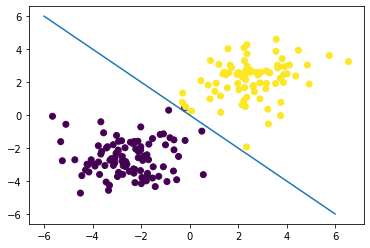

In [56]:
fig, ax = plt.subplots()
ax.scatter(teste.SaldoConta, teste['SaldoInvestimento'],c = teste.Situacao)
x = [6,-6]
y = [-6,6]
ax.plot(x, y)

plt.show()

In [57]:
confusion_matrix(teste.Situacao, teste.predict)

array([[98,  1],
       [ 0, 79]])

In [58]:
accuracy_score(teste.Situacao, teste.predict)

0.9943820224719101

In [59]:
precision_score(teste.Situacao, teste.predict)

0.9875

### Usando o treino e teste split

In [60]:
arquivo = pd.read_excel("BaseInadimplencia.xlsx")

In [61]:
arquivo.shape

(1000, 3)

In [62]:
arquivo

,SaldoConta,SaldoInvestimento,Situacao
0,-1.365390,-3.280278,0
1,-1.992492,-4.158429,0
2,-3.910816,-0.874096,0
3,-2.745822,-2.250098,0
4,-1.352205,-1.280924,0
...,...,...,...
995,2.258579,2.014766,1
996,1.446370,3.518259,1
997,2.678502,3.712650,1
998,2.370208,3.720116,1


### Separando treino e teste

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
x = arquivo[["SaldoConta", "SaldoInvestimento"]]
y = arquivo["Situacao"]

In [65]:
x_train, x_teste, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

In [66]:
# Transformando essa reta em uma função para classificar os pontos
def clf(x,y):
    # y_modelo = -x_modelo
    y_modelo = -x

    # Se y_modelo > y_dado -> class: 0
    if y_modelo >= y:
        return 0
    # Se y_modelo < y_dado -> class: 1
    elif y_modelo < y:
        return 1

In [67]:
y_pred_train = x_train.apply(lambda x: clf(x["SaldoConta"], x["SaldoInvestimento"]), axis = 1)

In [68]:
y_pred_teste = x_teste.apply(lambda x: clf(x["SaldoConta"], x["SaldoInvestimento"]), axis = 1) 

In [70]:
y_pred_train

703    1
311    0
722    1
629    1
0      0
      ..
106    0
270    0
860    1
435    0
102    0
Length: 670, dtype: int64

y_pred_teste

### Avaliando modelo

In [74]:
from sklearn.metrics import confusion_matrix

In [75]:
confusion_matrix(y_train, y_pred_train)

array([[359,   1],
       [  0, 310]])

In [78]:
confusion_matrix(y_test, y_pred_teste)

array([[183,   0],
       [  0, 147]])

In [80]:
accuracy_score(y_train, y_pred_train)

0.9985074626865672

In [81]:
accuracy_score(y_test, y_pred_teste)

1.0

In [82]:
precision_score(y_train, y_pred_train)

0.9967845659163987

In [83]:
precision_score(y_test, y_pred_teste)

1.0

In [84]:
recall_score(y_train, y_pred_train)

1.0

In [85]:
recall_score(y_test, y_pred_teste)

1.0